In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1600,2020-09-11,United Kingdom,357283.0,358138.0,41653.0,41608.0,-855.0,45.0
1601,2020-09-11,Germany,256430.0,256850.0,9354.0,9342.0,-420.0,12.0
1602,2020-09-11,Iran,397083.0,395488.0,22905.0,22798.0,1595.0,107.0
1603,2020-09-11,Turkey,286338.0,286455.0,6878.0,6895.0,-117.0,-17.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  9549.832398753893
RMSE =  36612.52482890302


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  303.7694704049844
RMSE =  748.2061962784943


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  68674.95394736843
RMSE =  115354.17346592441
-- World performances for deaths --
MAE =  1730.592105263158
RMSE =  2106.317908478905


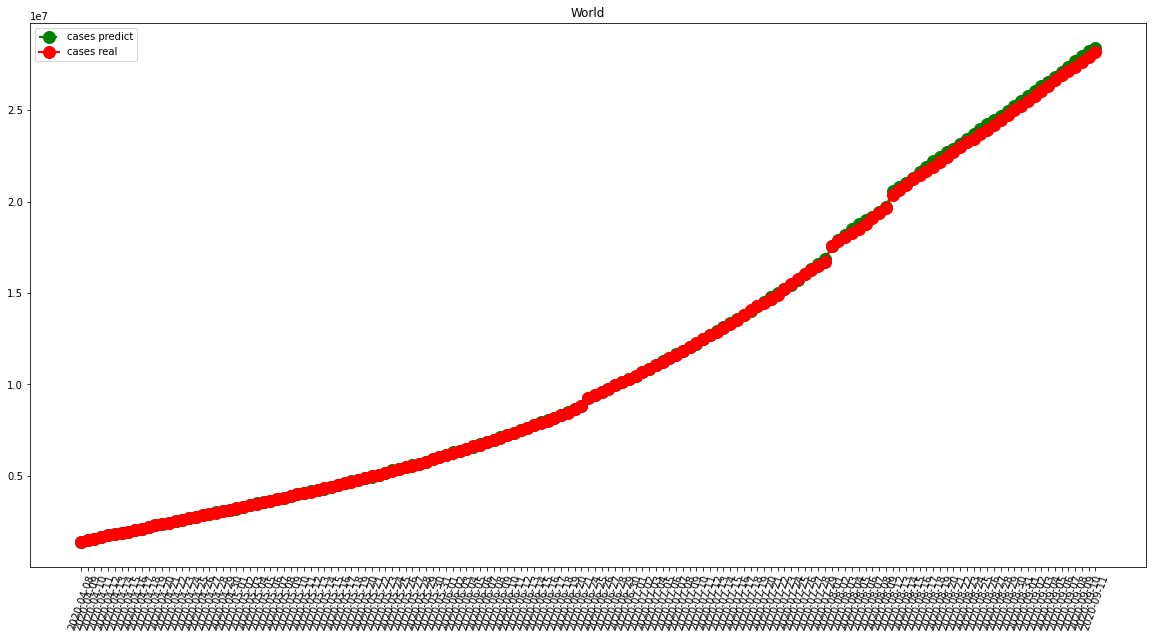

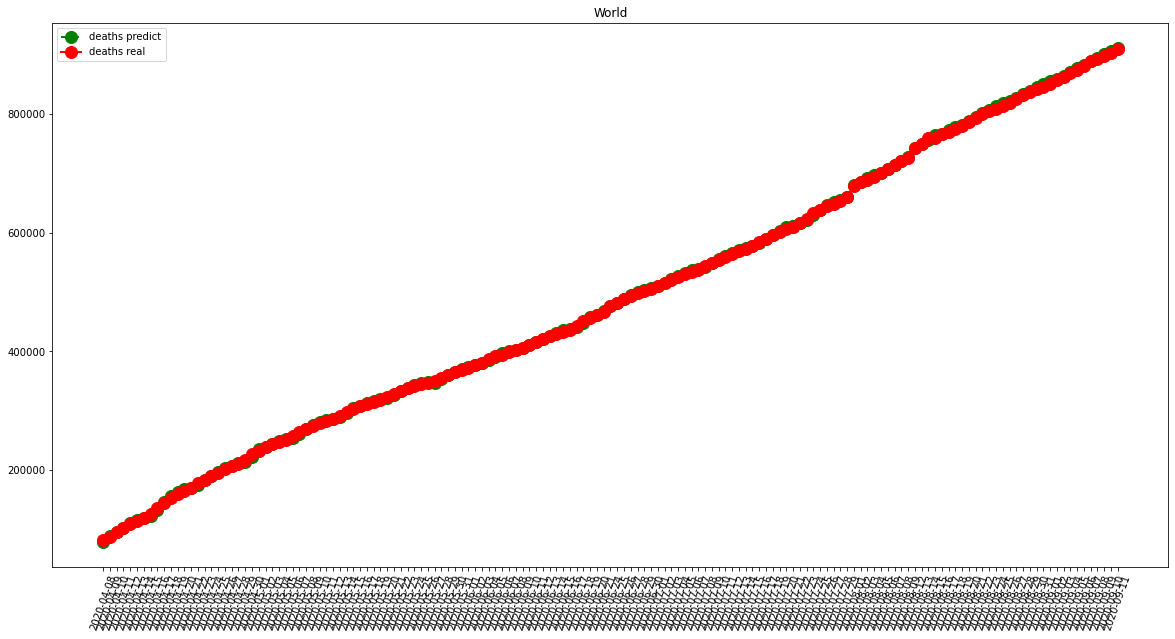

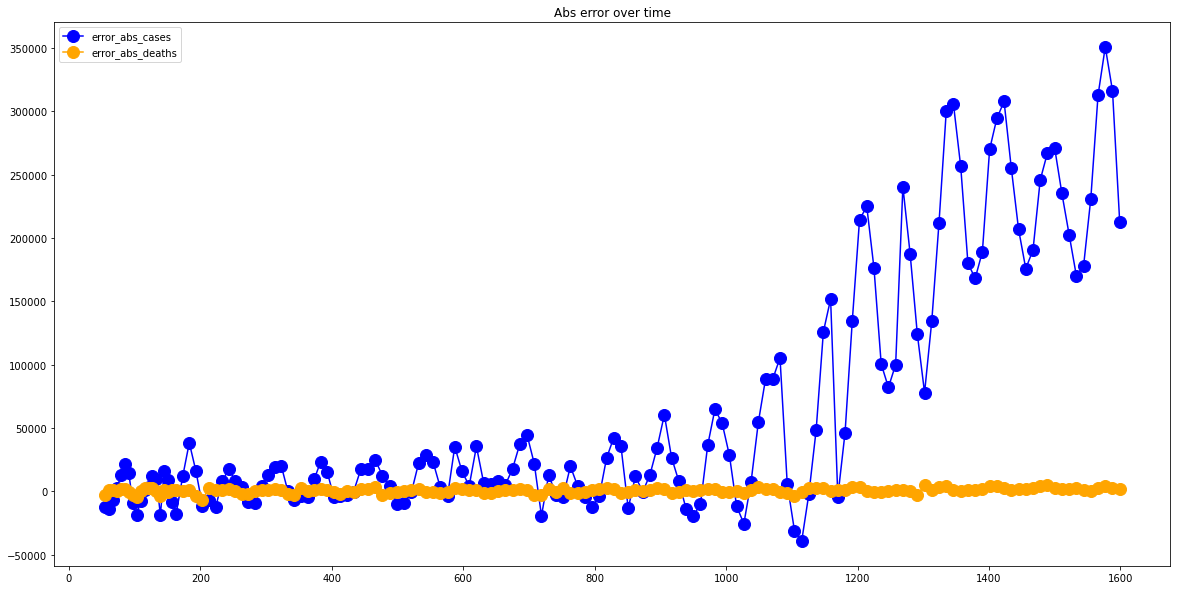

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1070.6234567901236
RMSE =  1600.863241280763
-- France performances for deaths --
MAE =  116.35802469135803
RMSE =  263.595767027966


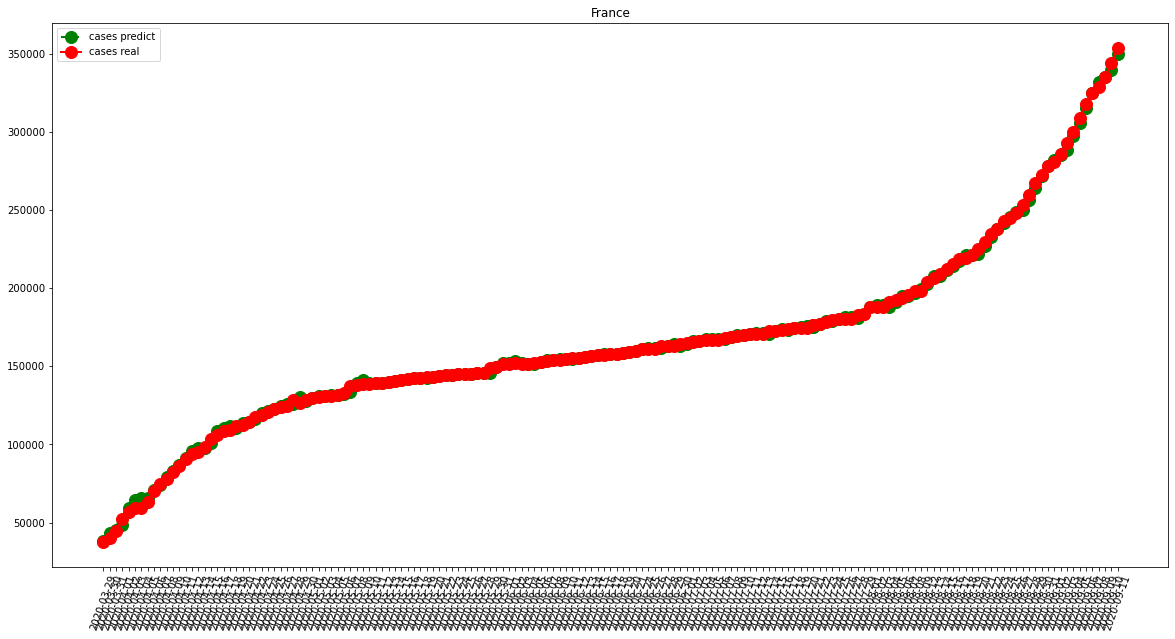

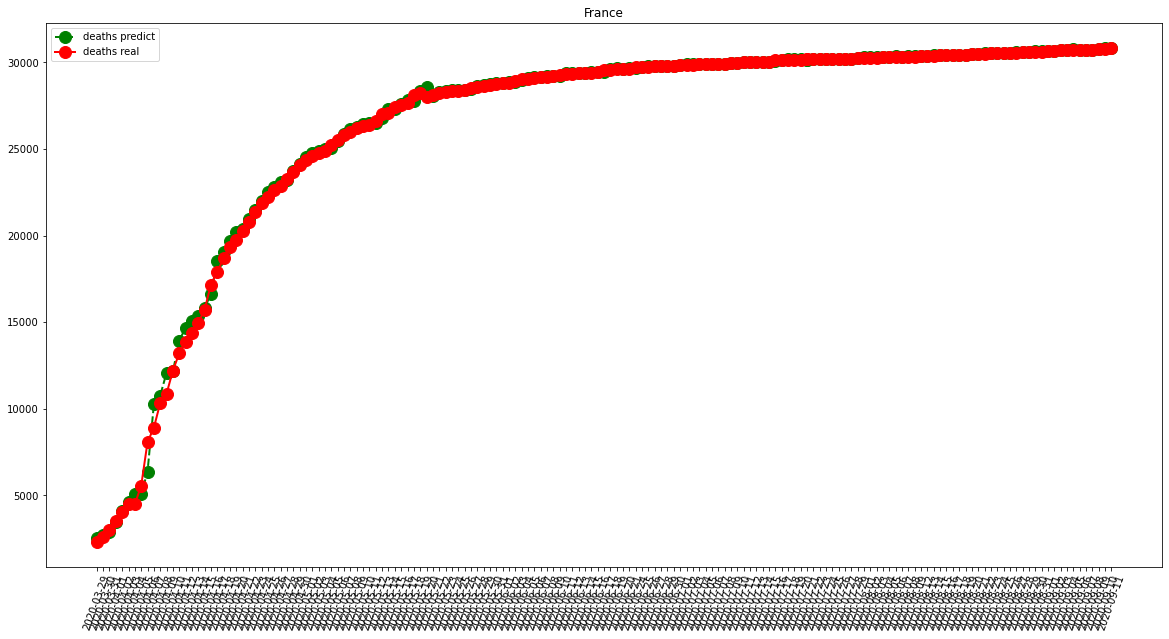

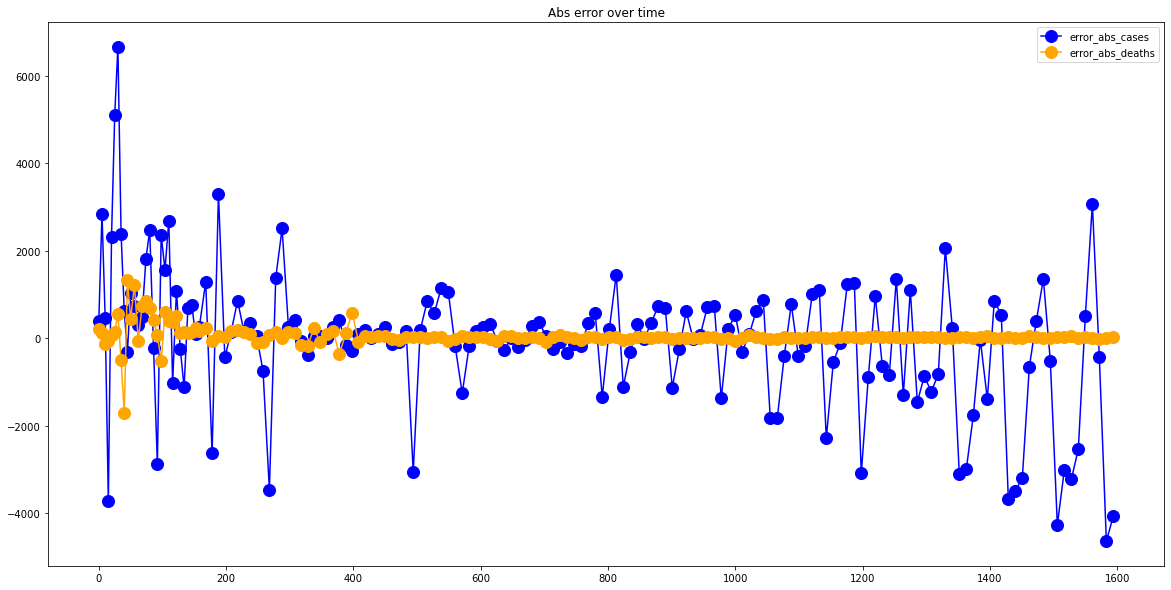

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  306.22222222222223
RMSE =  452.54233824166613
-- Italy performances for deaths --
MAE =  69.80864197530865
RMSE =  233.26606173113902


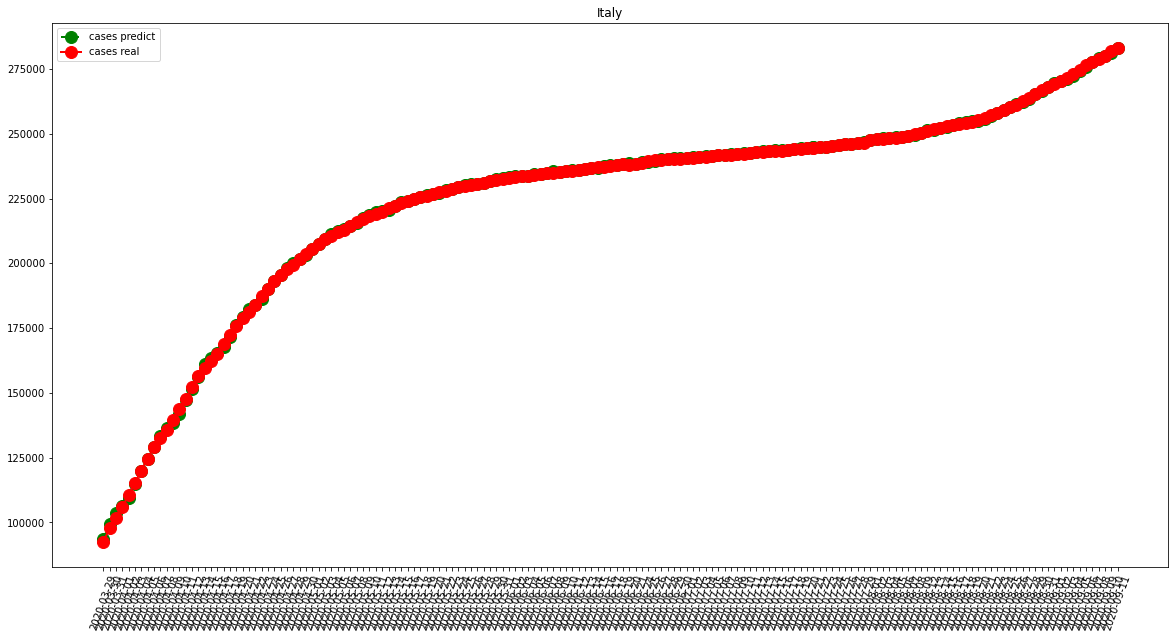

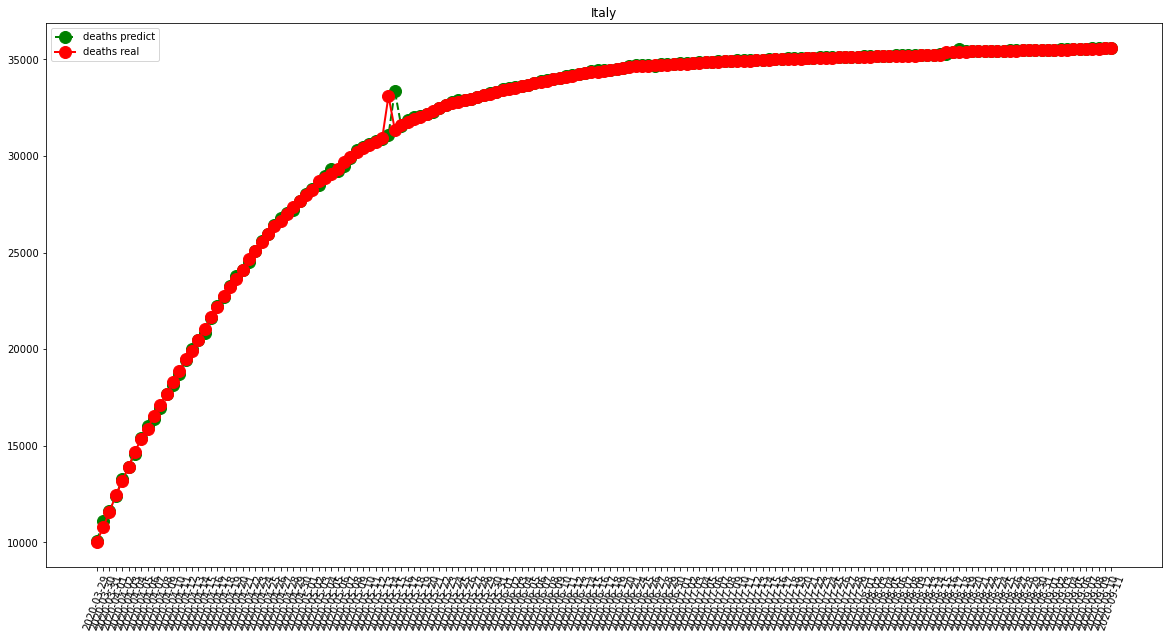

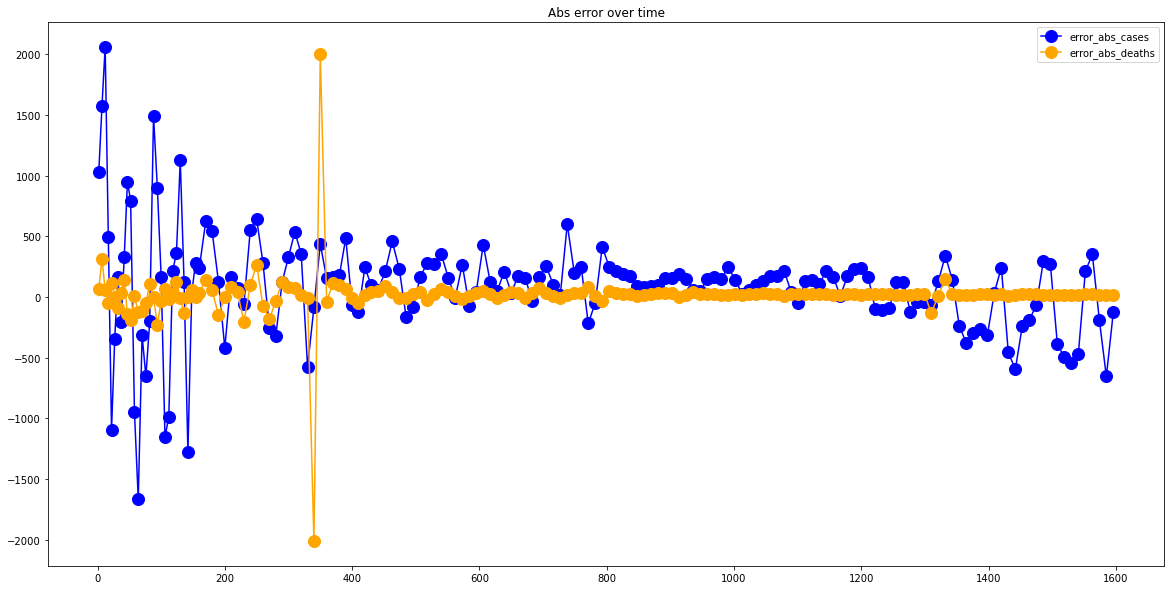

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2237.543209876543
RMSE =  4392.34074804239
-- Spain performances for deaths --
MAE =  122.46913580246914
RMSE =  319.8618528963271


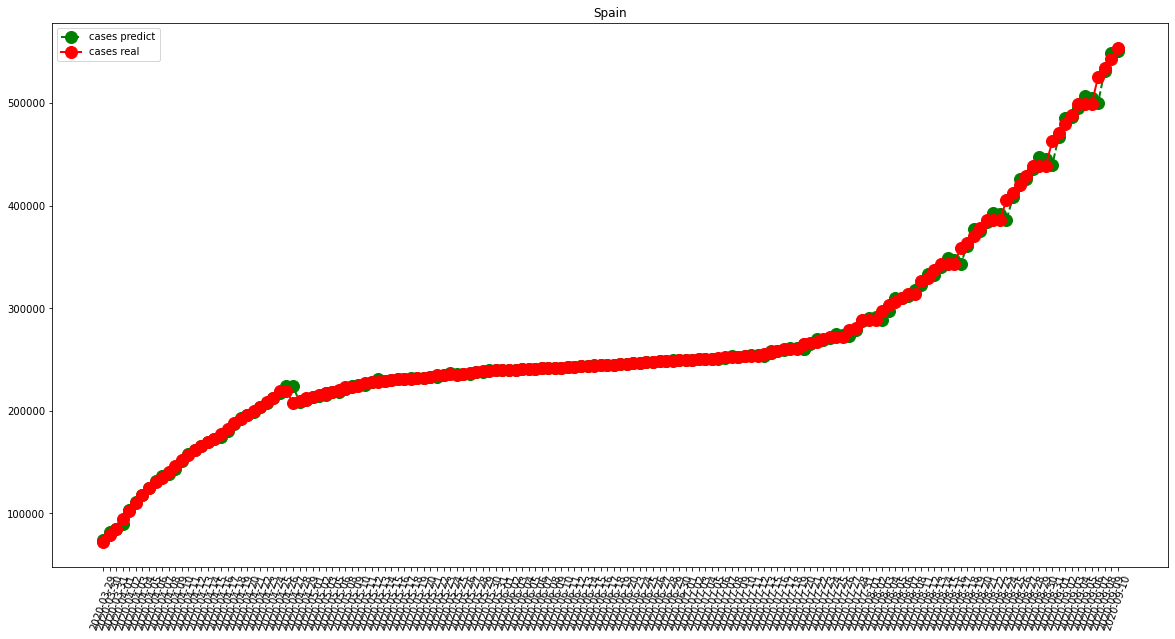

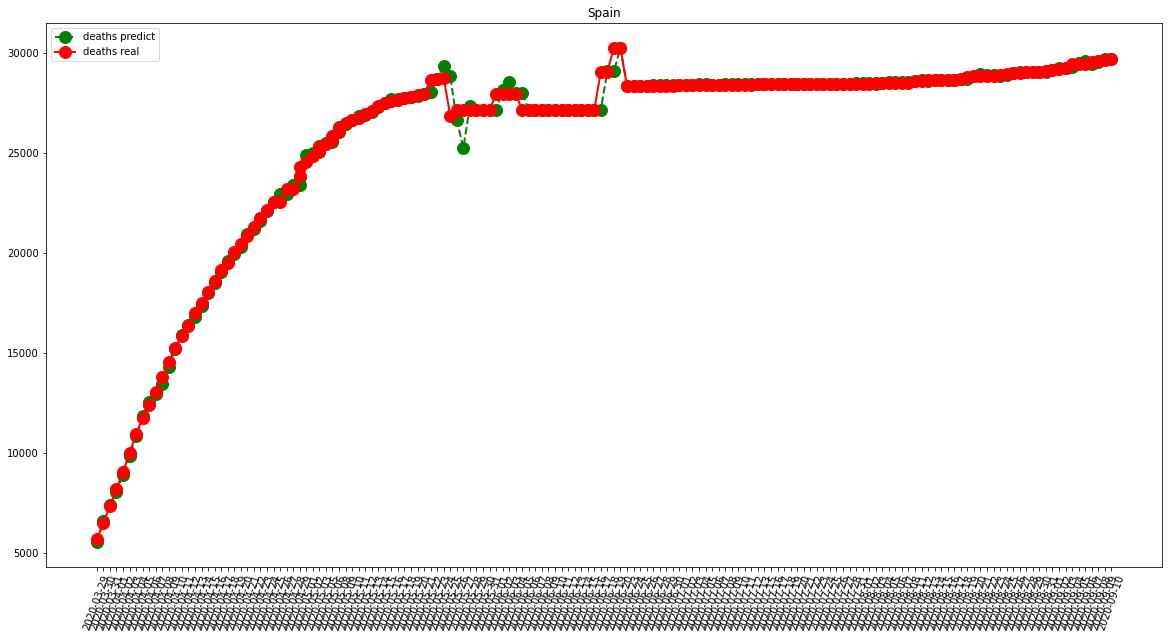

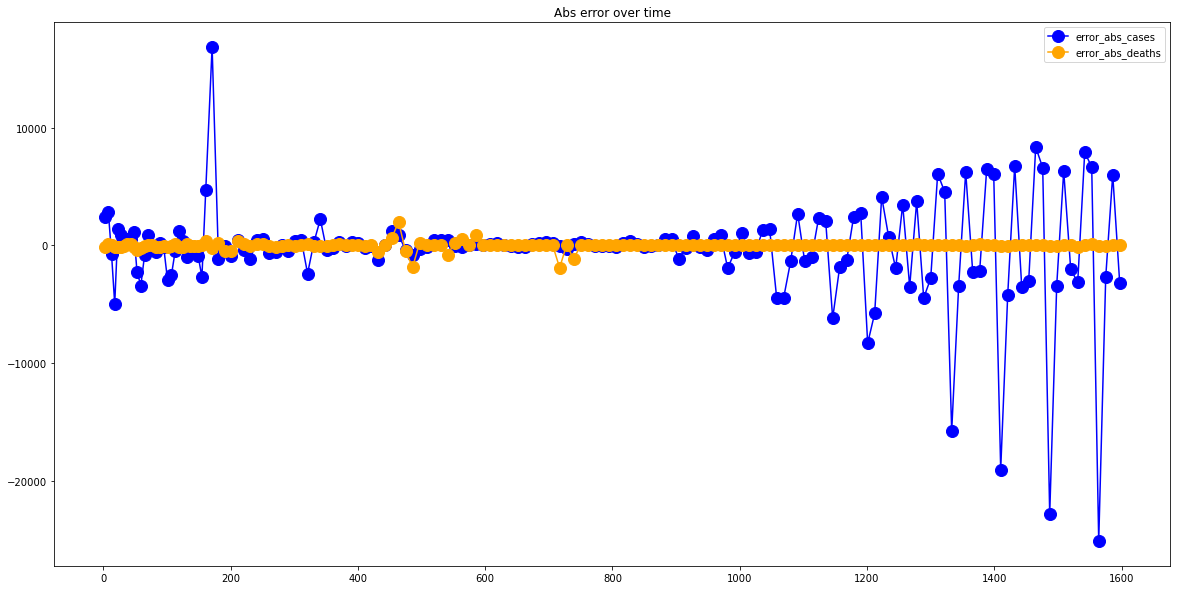

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  14280.895061728395
RMSE =  21957.918972968655
-- United States performances for deaths --
MAE =  484.2283950617284
RMSE =  681.1226254237907


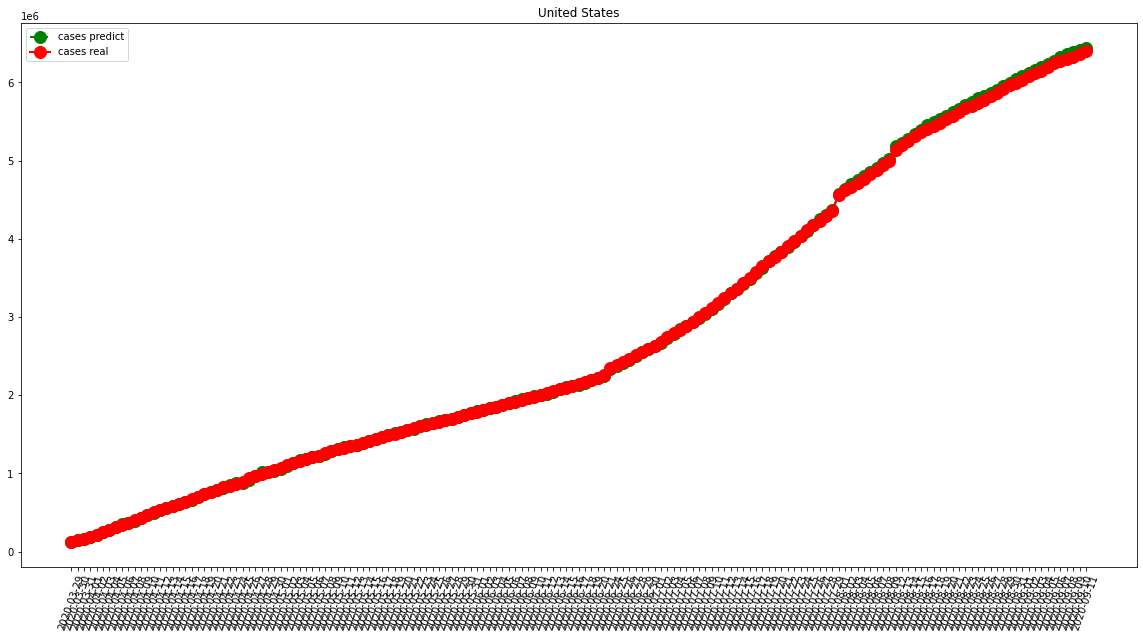

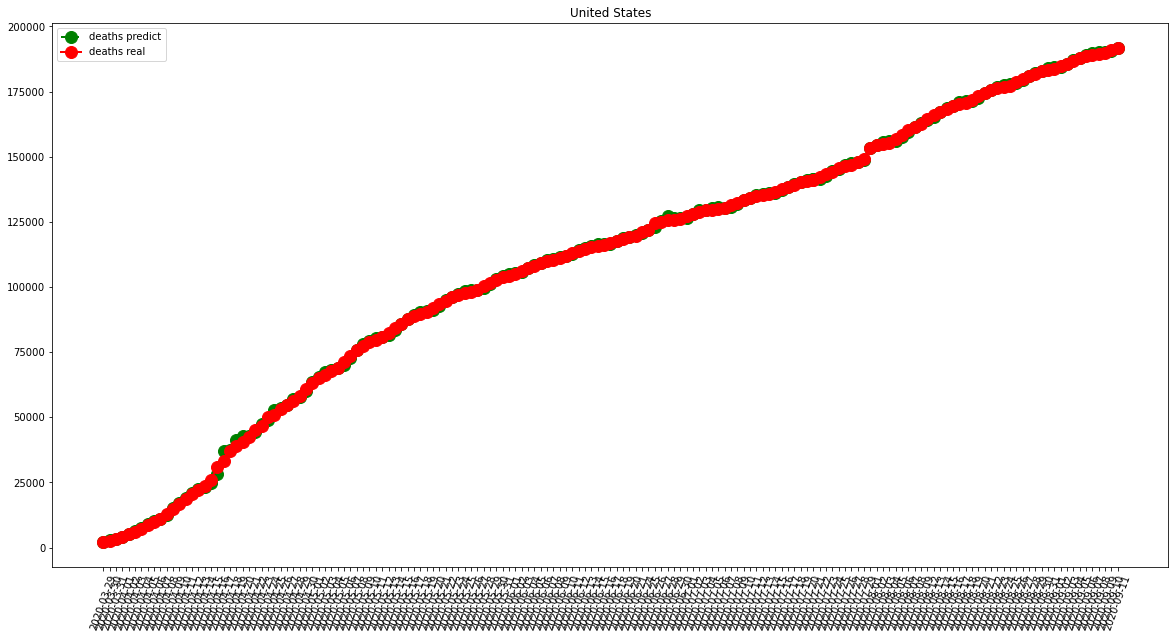

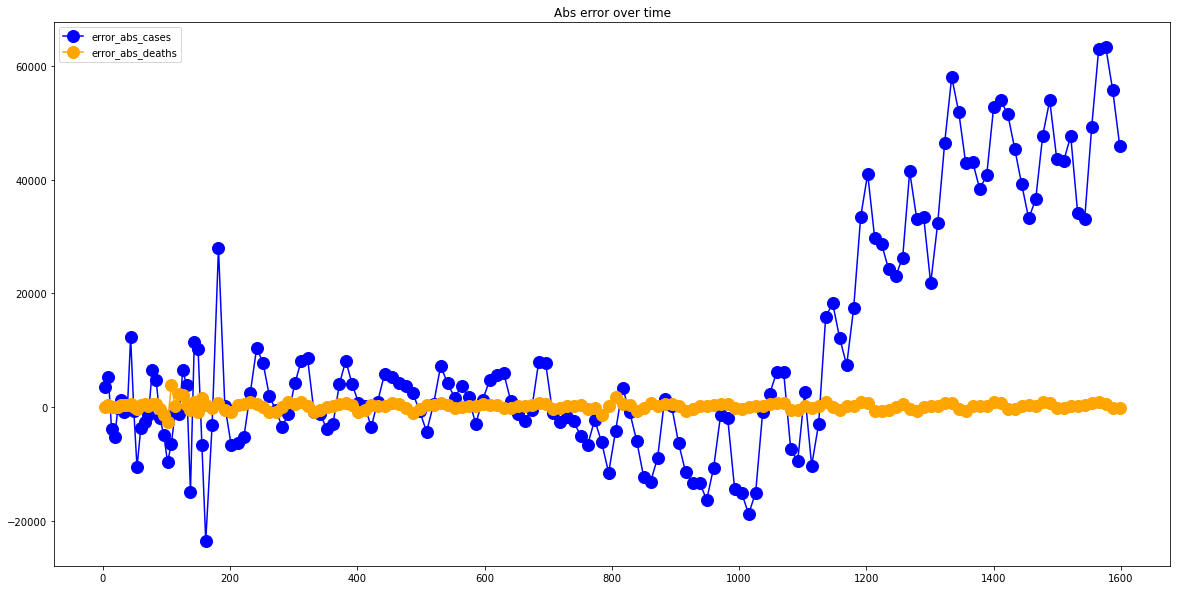

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  62.32098765432099
RMSE =  93.78054234998213
-- China performances for deaths --
MAE =  26.049382716049383
RMSE =  123.37671909568196


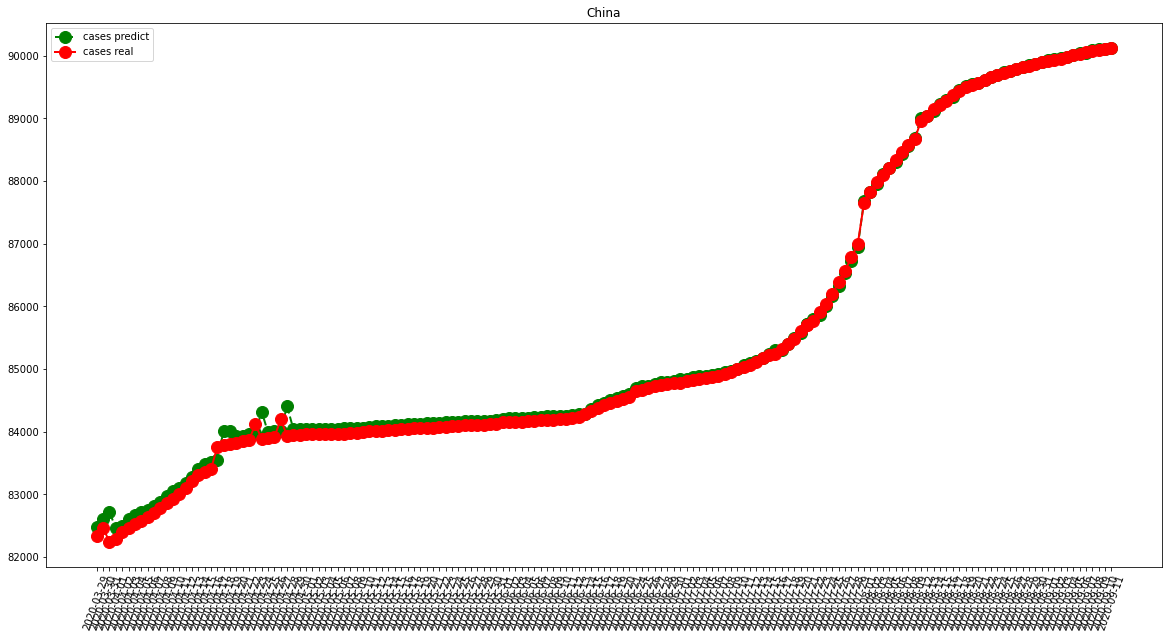

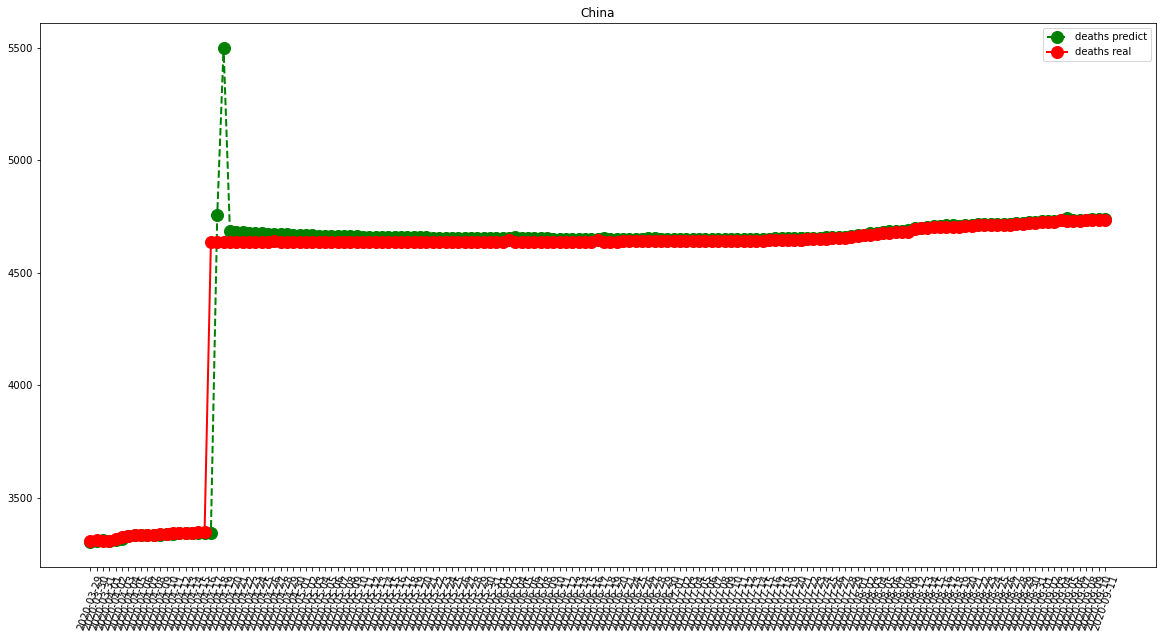

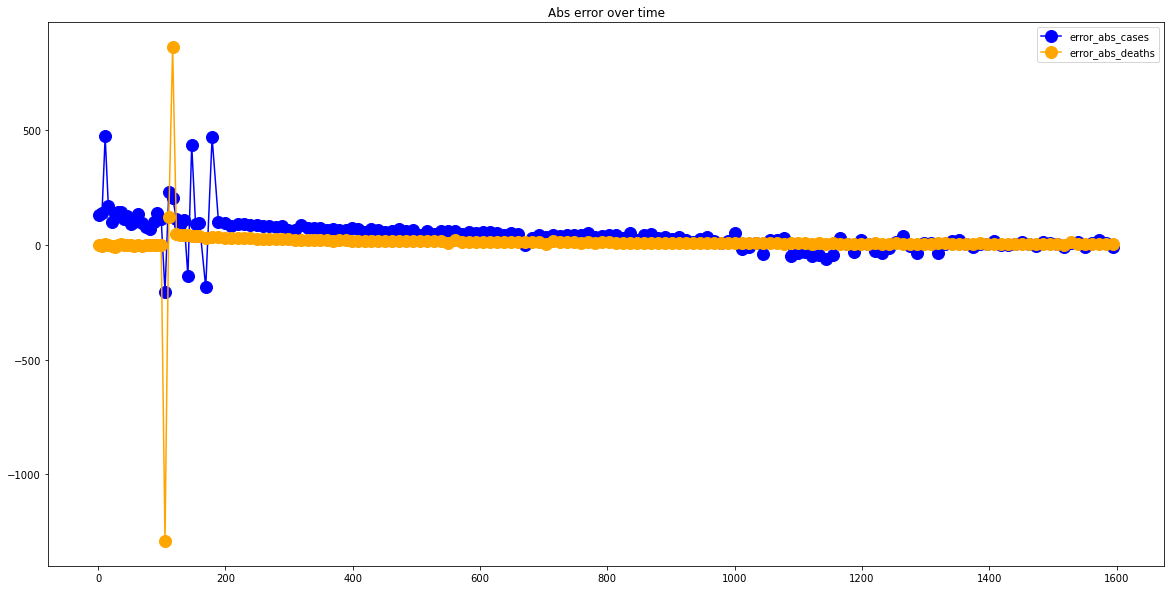

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1019.6940298507462
RMSE =  3617.0298516546964
-- United Kingdom performances for deaths --
MAE =  228.00746268656715
RMSE =  737.2913162886342


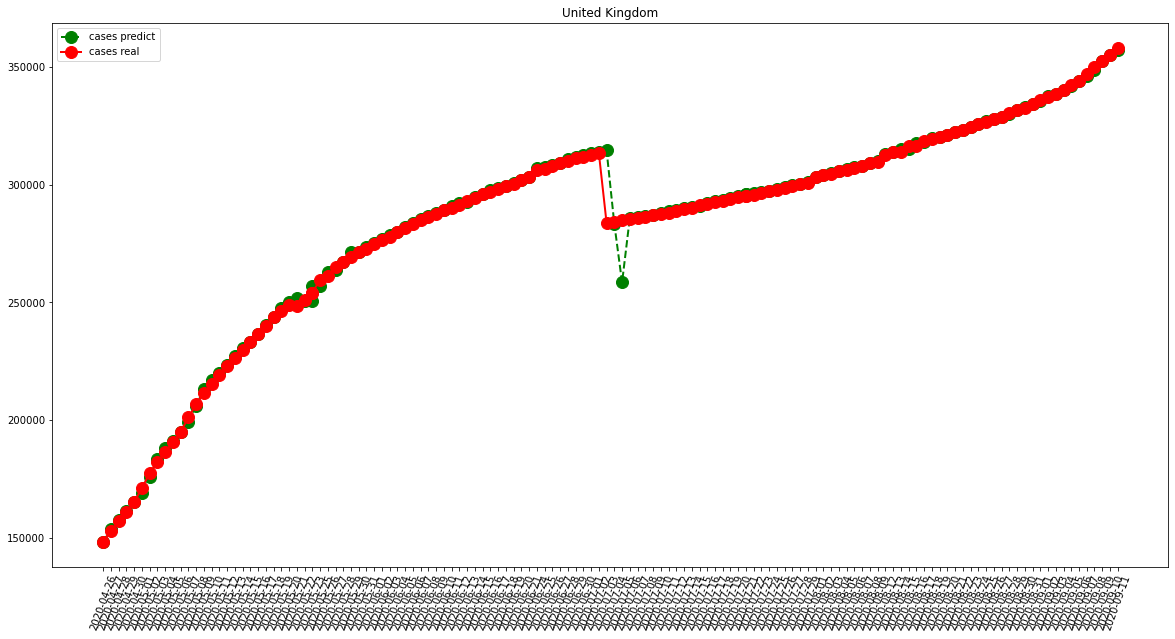

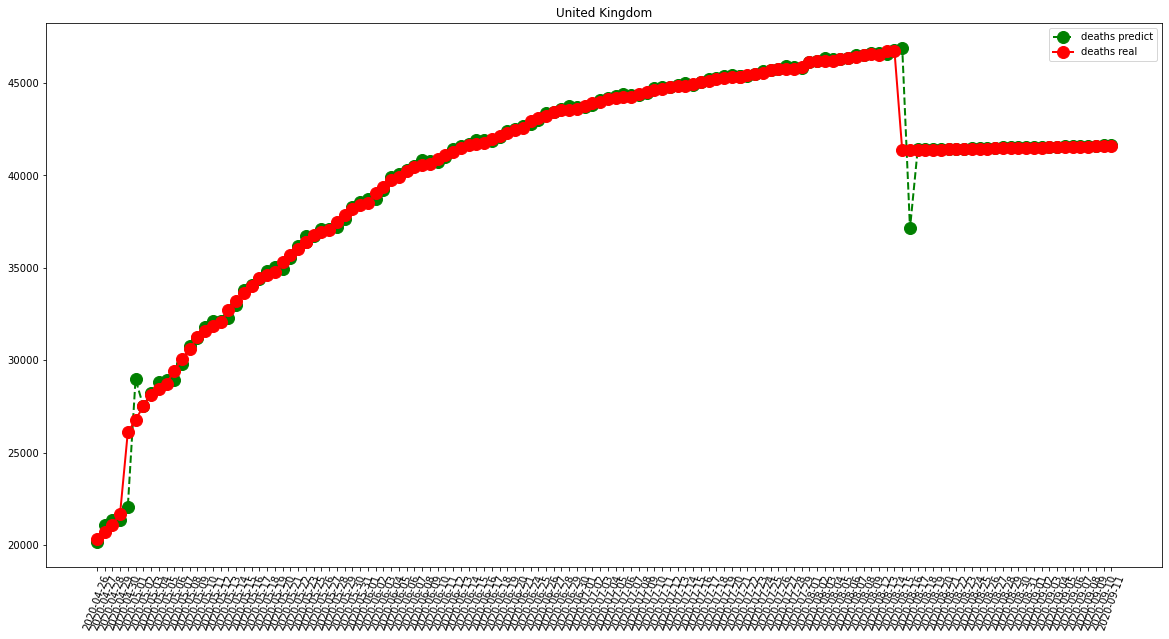

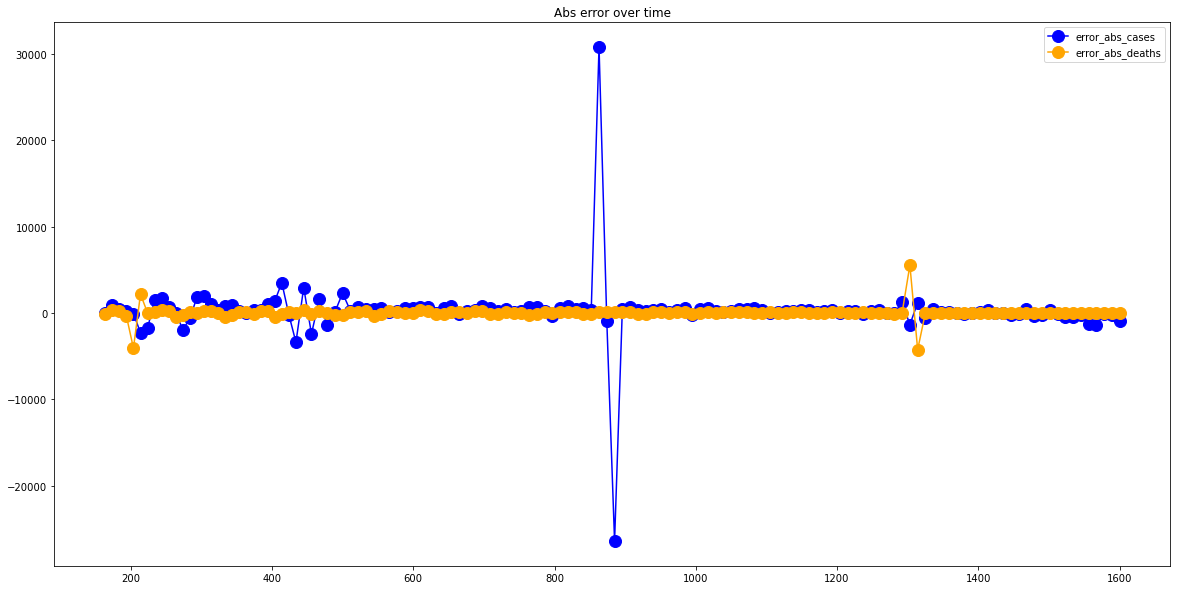

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  407.4029850746269
RMSE =  582.6680783707297
-- Germany performances for deaths --
MAE =  19.955223880597014
RMSE =  38.02846537929815


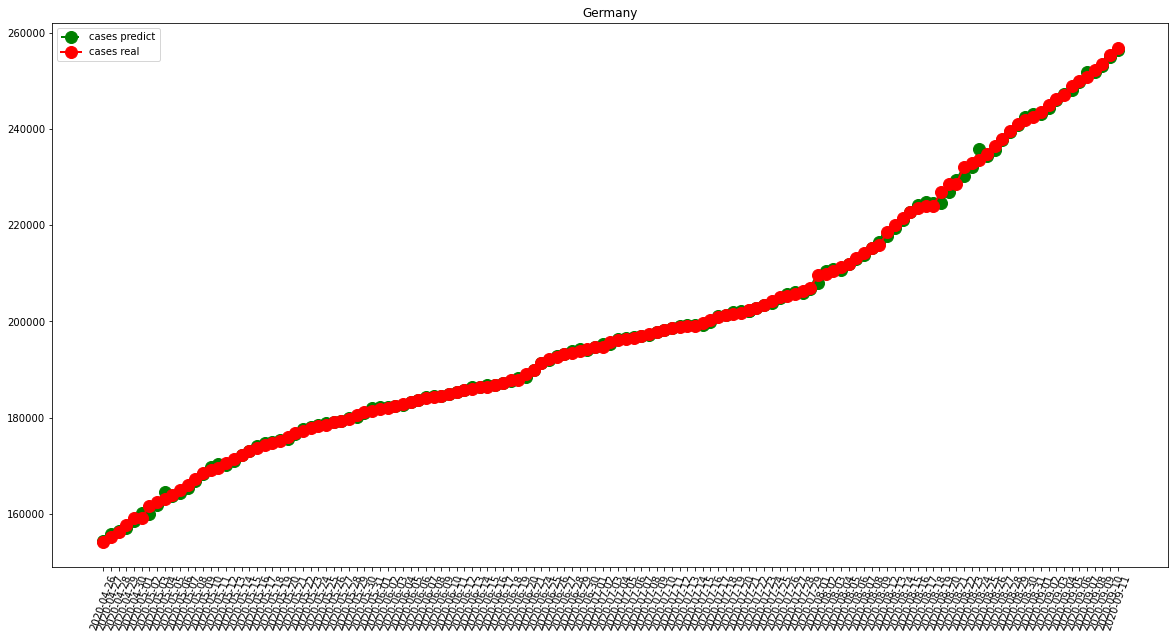

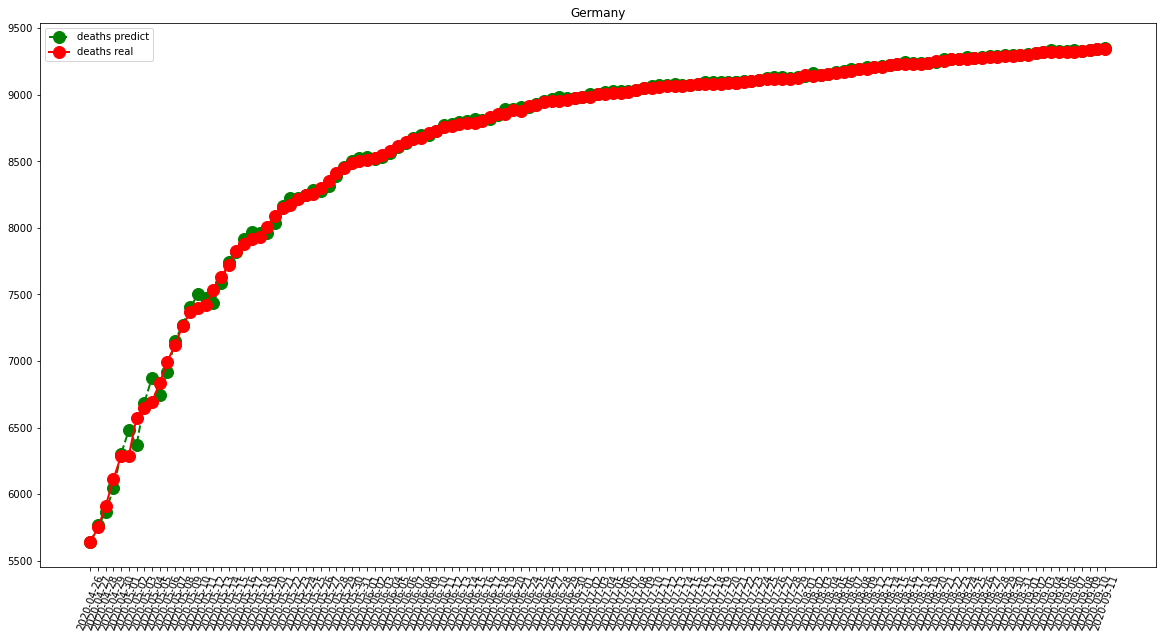

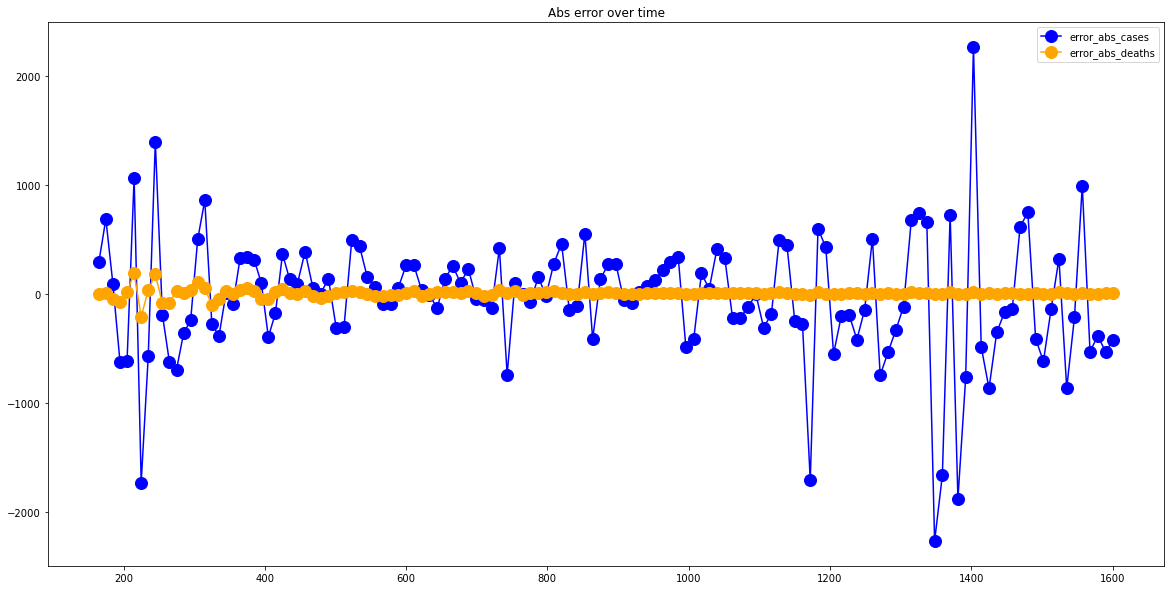

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  877.1417910447761
RMSE =  1244.223713507234
-- Iran performances for deaths --
MAE =  50.223880597014926
RMSE =  85.6749323305875


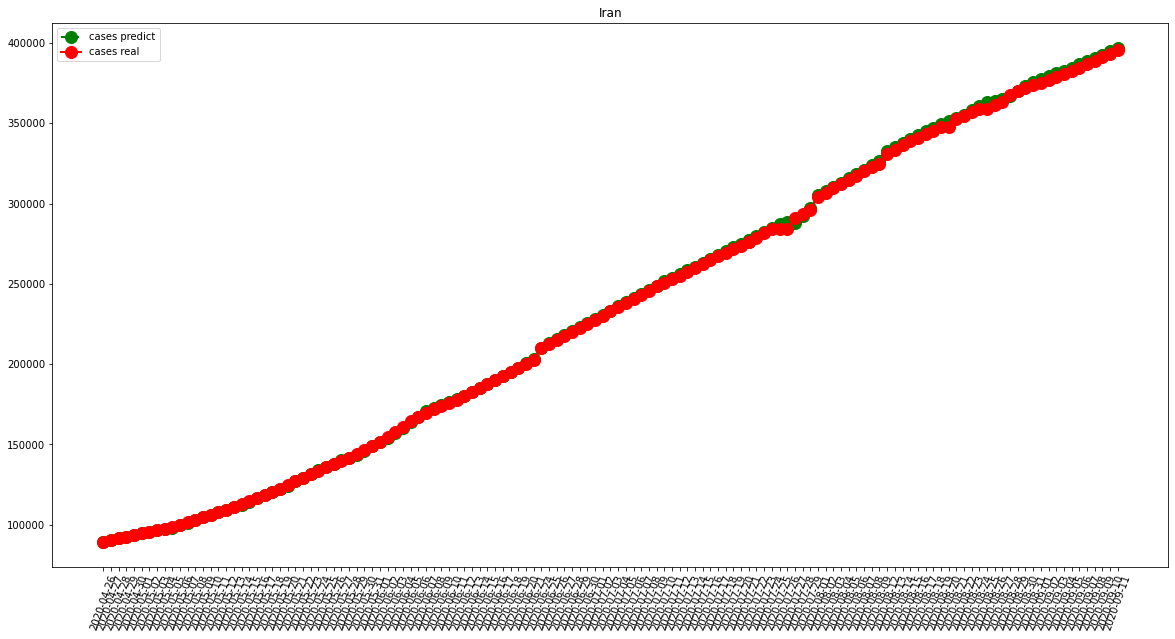

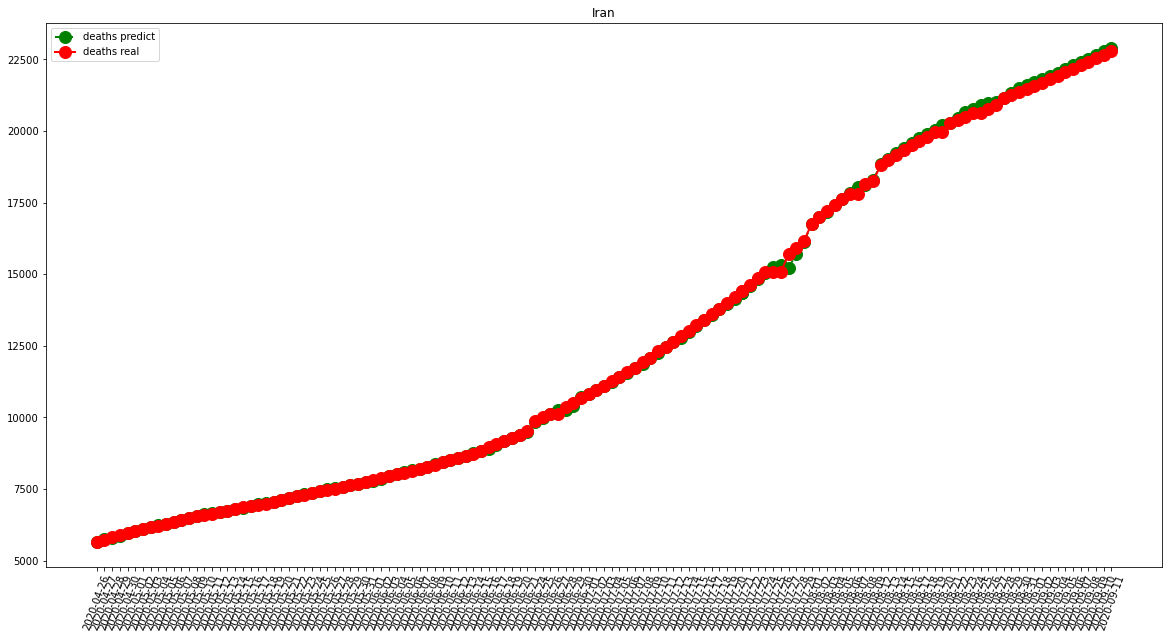

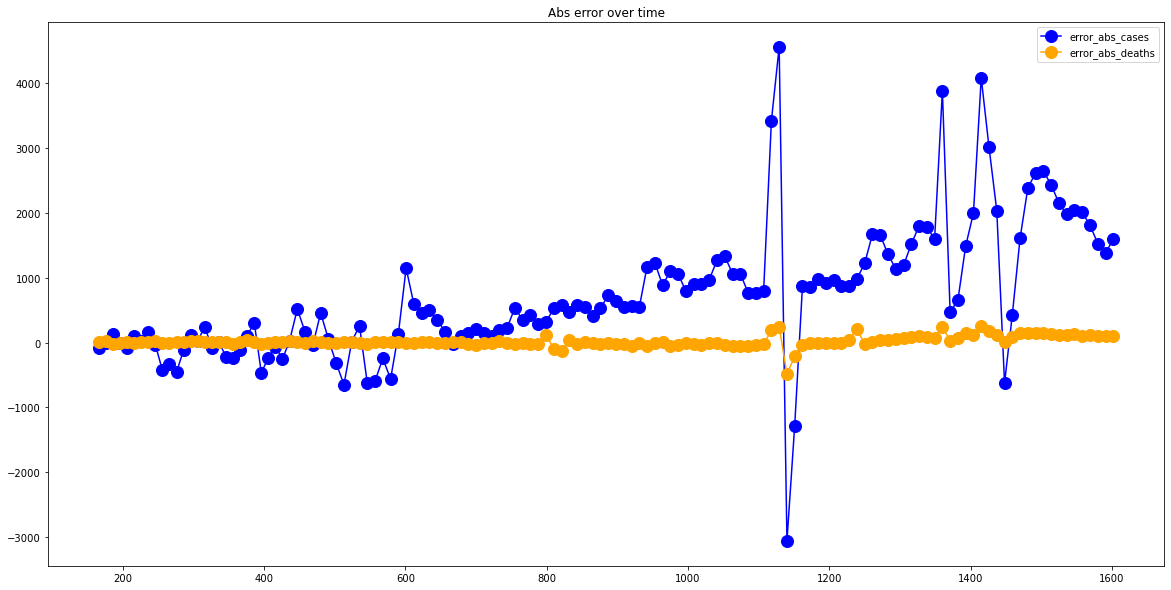

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  211.07462686567163
RMSE =  326.72837776327435
-- Turkey performances for deaths --
MAE =  16.059701492537314
RMSE =  87.82037298057759


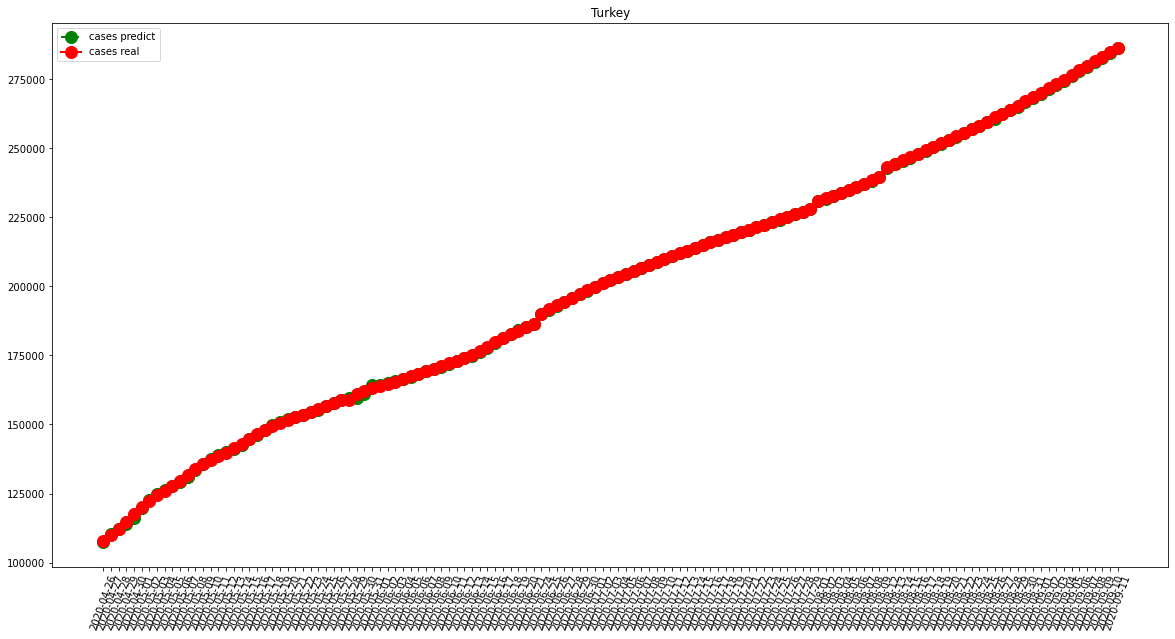

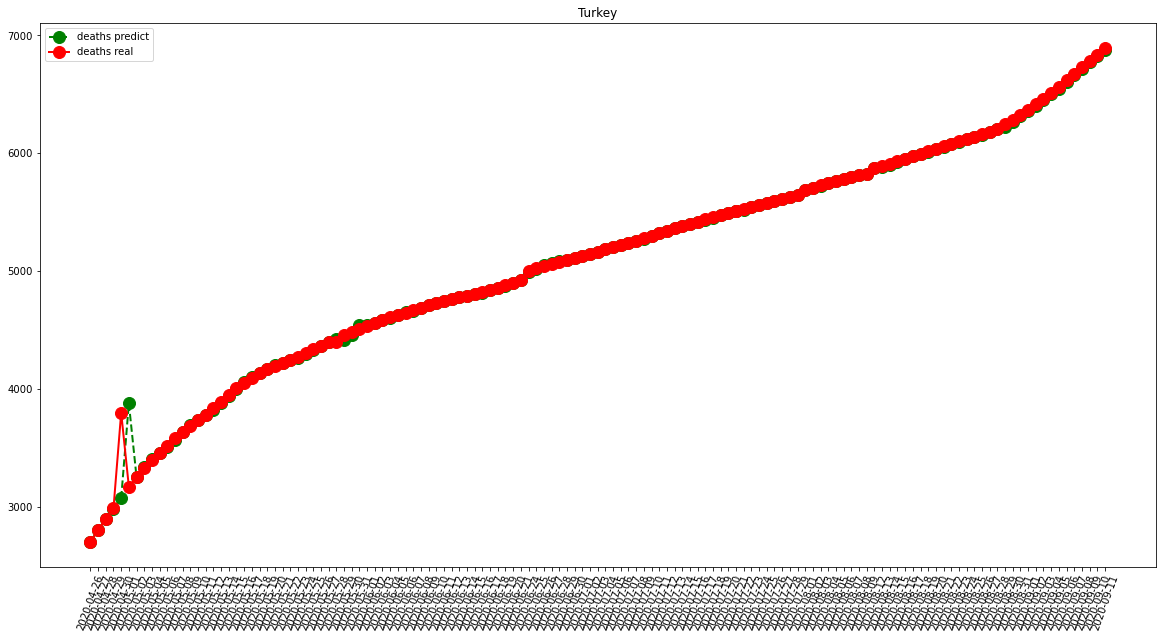

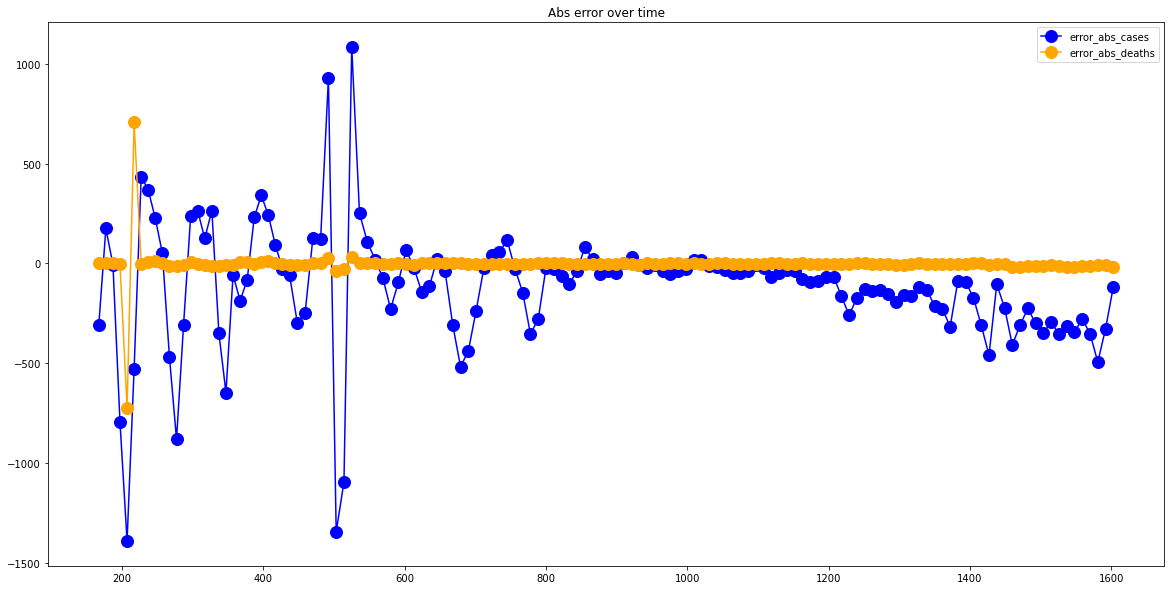

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  15352.373831775702
RMSE =  20544.164466489463
-- Brazil performances for deaths --
MAE =  464.7383177570093
RMSE =  570.4462673427126


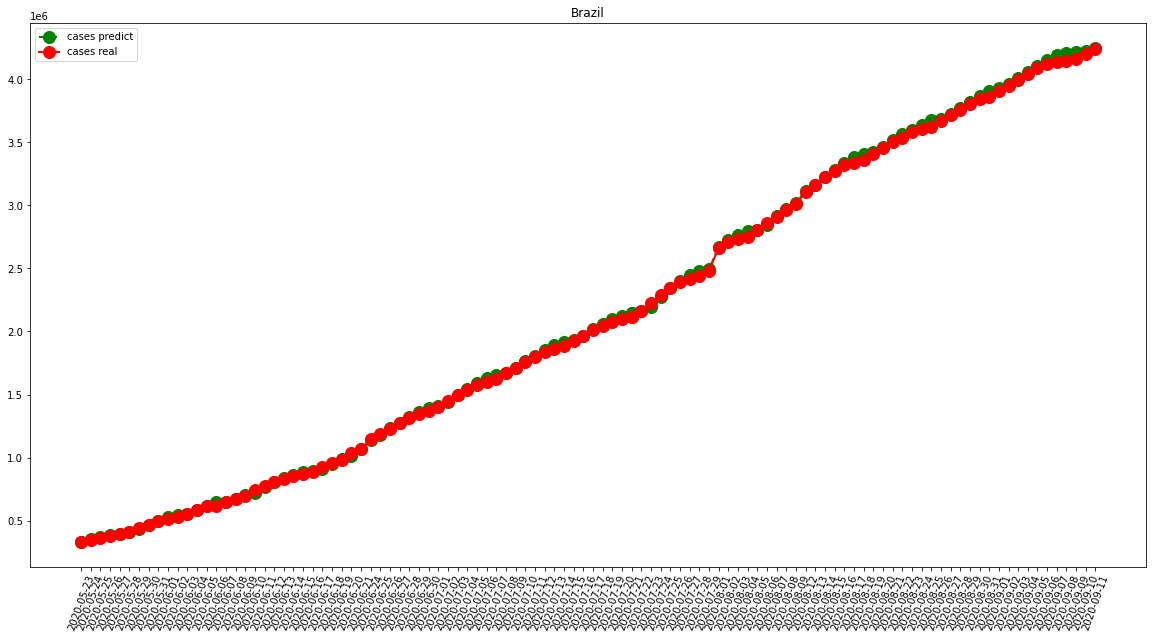

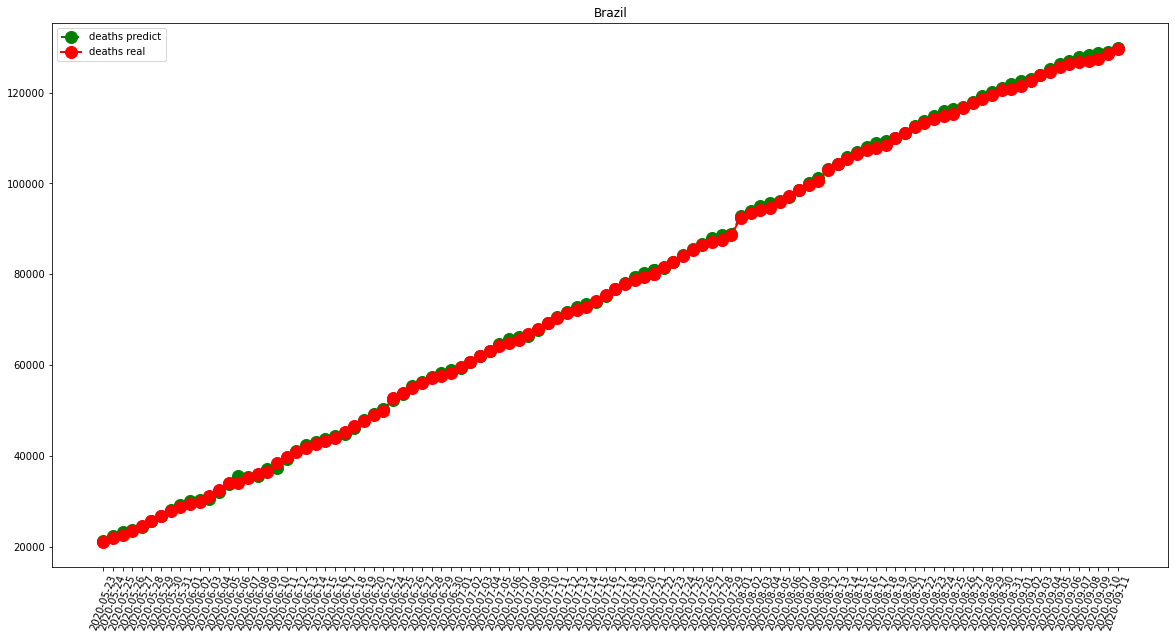

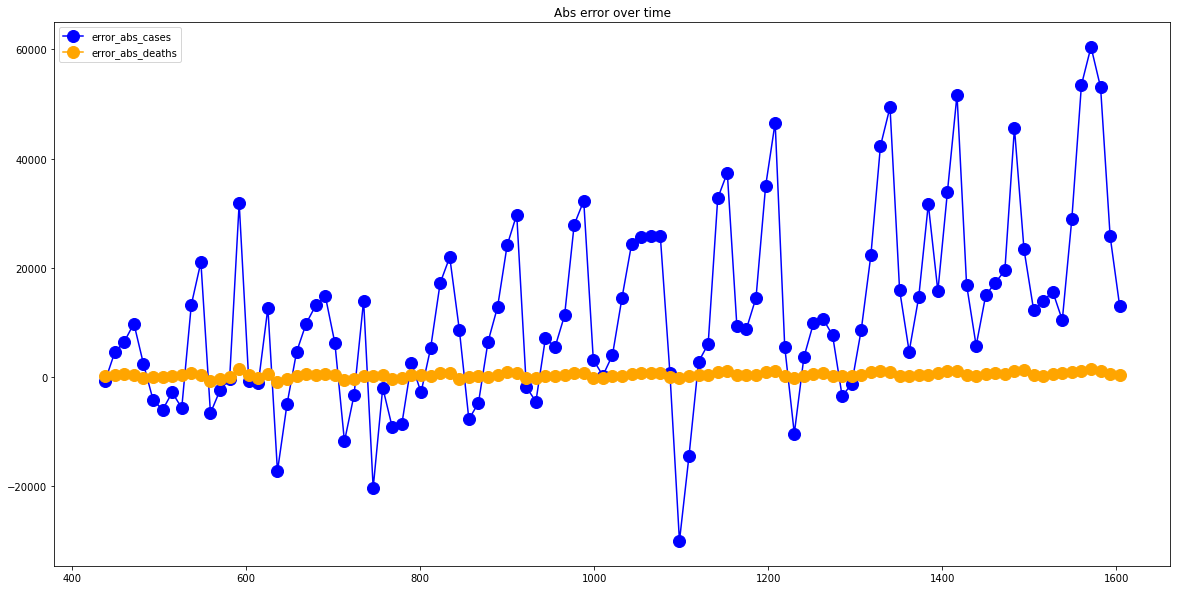

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)